In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import category_encoders as ce
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from skrebate import ReliefF

from collections import Counter
from scipy import stats
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier

C:\Users\axt180026\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# Loading feature names
data = pd.read_csv(r'C:\Users\axt180026\Desktop\Radiomics\train_5.csv')
tst_data = pd.read_csv(r'C:\Users\axt180026\Desktop\Radiomics\test_5.csv')


X_train, y_train = data.drop(['Pat_id','Label', 'Mask'], axis=1).values, data['Label'].values
X_test, y_test = tst_data.drop(['Pat_id','Label','Mask'], axis=1).values, tst_data['Label'].values
X_train = preprocessing.normalize(X_train,axis=1)
X_test = preprocessing.normalize(X_train,axis=1)

pd.DataFrame(X_train).fillna(pd.DataFrame(X_train).mean(), inplace=True)
pd.DataFrame(X_test).fillna(pd.DataFrame(y_test).mean(), inplace=True)

In [3]:
## Removing outliers
X_trn=X_train[(np.abs(stats.zscore(X_train)) < 3).all(axis=1)]
print(np.shape(X_trn))

y_trn=y_train[(np.abs(stats.zscore(X_train)) < 3).all(axis=1)]
print(np.shape(y_trn))

(412, 32)
(412,)


In [4]:
print(np.shape(X_train)[1])

32


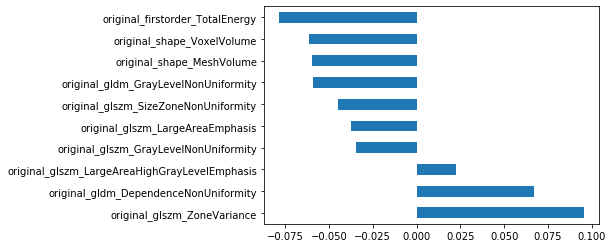

In [5]:
# Pearson Corelation
from scipy.stats import pearsonr
import numpy as np
import array

X =X_train 
y = y_train
e = 2.465 
corr1=np.zeros((np.shape(X_train)[1],))
for i in range(0,np.shape(X_train)[1]):
    X=X_train[:,i]
    X=X.reshape(-1,1)
    x_nor=preprocessing.normalize(X,axis=0)
    x_new=X**e + np.random.normal(0,10**e,X.shape)
    corr1[i],_=pearsonr(x_nor,y.reshape(-1,1))

feat_importances = pd.Series(corr1, index=data.drop(['Pat_id','Label', 'Mask'], axis=1).columns)
feat_importances.nlargest(10).plot(kind='barh') # Plot of first 25 features with largest coefficient
plt.show()

In [6]:
# ReliefF feature selection
clf_relief=ReliefF(n_features_to_select=10, n_neighbors=100) 
clf_re=clf_relief.fit(X_train,y_train)
X_train_RF=clf_re.transform(X_train)
X_test_RF=clf_re.transform(X_test)

In [7]:
print(np.shape(X_train))

(454, 32)


C:\Users\axt180026\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


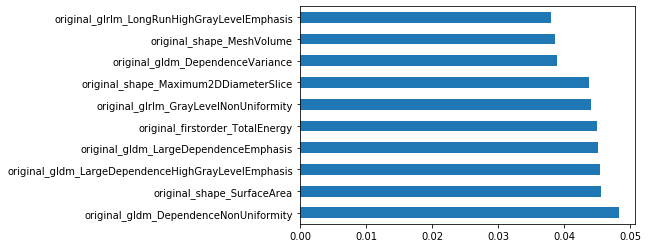

In [8]:
# Extra tree classifier Feature selection
X=X_train
y=y_train
clf_model = ExtraTreesClassifier()
clf_sel=clf_model.fit(X,y)
#print(clf_sel.feature_importances_)
feat_importances = pd.Series(clf_sel.feature_importances_, index=data.drop(['Pat_id','Label','Mask'], axis=1).columns)
#print(feat_importances)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [9]:
temp=list(corr1)

In [10]:
# creating Dataset based on selected feature
num_feat=10 # number of features
fea_var=feat_importances.nlargest(10).index
header=dict()
for j in range(0,num_feat):
    for i in range(0,26):
        if tst_data.columns[i]==fea_var[j]:
            if j==0:
                header[j]=fea_var[j]
                x_train=data.values[:,j].reshape(-1,1)
                x_tst=tst_data.values[:,j].reshape(-1,1)
                
            else:
                header[j]=fea_var[j]
                x_train=np.append(x_train,data.values[:,j].reshape(-1,1),1)
                x_tst=np.append(x_tst,tst_data.values[:,j].reshape(-1,1),1)

pd.DataFrame(x_train).fillna(pd.DataFrame(x_train).mean(), inplace=True)        
print(np.shape(x_train))
print(np.shape(x_tst))

(454, 10)
(197, 10)
